# beginings / Linear



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku CSV
csv_path = r'C:\Users\USER098\Desktop\llmy\archive\data.csv'
df = pd.read_csv(csv_path)

# Upewnij się, że kolumna 'title' jest typu string
df['title'] = df['title'].astype(str)

# Upewnij się, że kolumna 'imdbAverageRating' jest typu float i pozbądź się NaN
df['imdbAverageRating'] = pd.to_numeric(df['imdbAverageRating'], errors='coerce')

# Usunięcie wierszy z brakującymi wartościami
df = df.dropna(subset=['title', 'imdbAverageRating'])

# Wybór losowych 50 punktów z posortowanych danych
df_sample = df.sample(n=50, random_state=1)

value=df_sample.sort_values(by='imdbAverageRating', ascending=False)

# Stworzenie wykresu
plt.figure(figsize=(10,6))
plt.bar(value['title'], value['imdbAverageRating'])

# Dostosowanie wykresu
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('IMDb Rating')
plt.title('Top 50 Movies by IMDb Rating (Random Sample)')

# Wyświetlenie wykresu
plt.show()
# !!! usunolem dane bo slabo je sie sprawdzalo z algorytmami !!!!

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER098\\Desktop\\llmy\\archive\\data.csv'

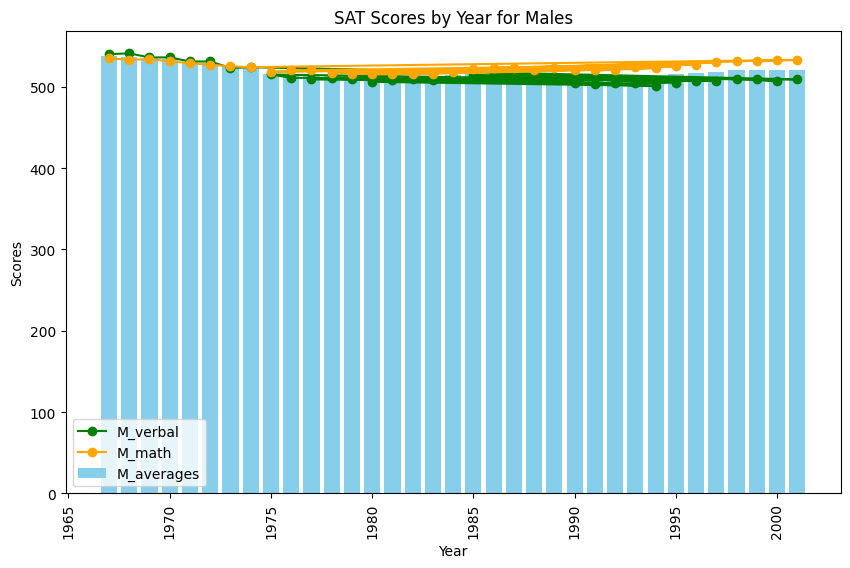

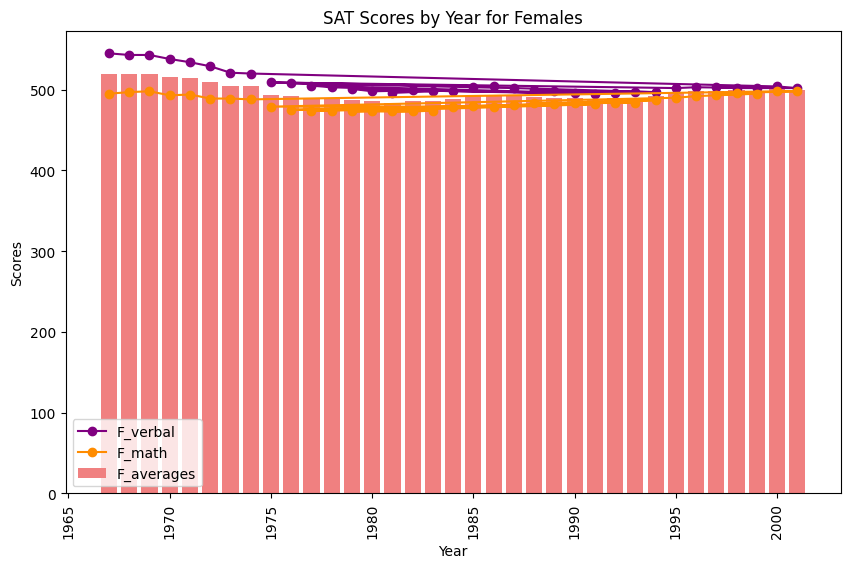

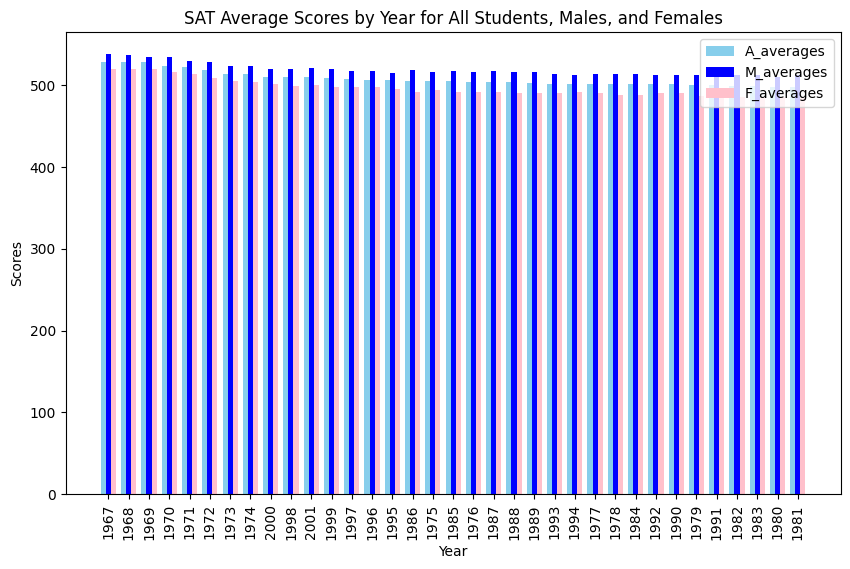

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\SAT_by_Year_Gender_1967_2001.csv'
df = pd.read_csv(csv_path)

# Sort and sample data for males
df_sorted_male = df.sort_values(by='M_averages', ascending=False).head(50)

# Plot for males
plt.figure(figsize=(10, 6))
plt.bar(df_sorted_male['Year'], df_sorted_male['M_averages'], color='skyblue', label="M_averages")
plt.plot(df_sorted_male['Year'], df_sorted_male['M_verbal'], color='green', marker='o', linestyle='-', label="M_verbal")
plt.plot(df_sorted_male['Year'], df_sorted_male['M_math'], color='orange', marker='o', linestyle='-', label="M_math")

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Scores')
plt.title('SAT Scores by Year for Males')
plt.legend()
plt.show()

# Sort and sample data for females
df_sorted_female = df.sort_values(by='F_averages', ascending=False).head(50)

# Plot for females
plt.figure(figsize=(10, 6))
plt.bar(df_sorted_female['Year'], df_sorted_female['F_averages'], color='lightcoral', label="F_averages")
plt.plot(df_sorted_female['Year'], df_sorted_female['F_verbal'], color='purple', marker='o', linestyle='-', label="F_verbal")
plt.plot(df_sorted_female['Year'], df_sorted_female['F_math'], color='darkorange', marker='o', linestyle='-', label="F_math")

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Scores')
plt.title('SAT Scores by Year for Females')
plt.legend()
plt.show()

# Combined bar chart for averages (all students, males, and females)
df_sorted_all = df.sort_values(by='A_averages', ascending=False).head(50)

# Define bar width and adjust positions to avoid overlap
bar_width = 0.25
years = df_sorted_all['Year']
x = range(len(years))

# Create figure
plt.figure(figsize=(10, 6))
plt.bar([pos - bar_width for pos in x], df_sorted_all['A_averages'], color='skyblue', width=bar_width, label="A_averages")
plt.bar(x, df_sorted_all['M_averages'], color='blue', width=bar_width, label="M_averages")
plt.bar([pos + bar_width for pos in x], df_sorted_all['F_averages'], color='pink', width=bar_width, label="F_averages")

# Customize plot
plt.xticks(x, years, rotation=90)
plt.xlabel('Year')
plt.ylabel('Scores')
plt.title('SAT Average Scores by Year for All Students, Males, and Females')
plt.legend()
plt.show()


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\SAT_by_Year_Gender_1967_2001.csv'
df = pd.read_csv(csv_path)

# Wybieranie cech i zmiennej docelowej
X = df[['Year', 'M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal', 'A_math']]
y = df['A_averages']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Tworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie i ocena
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.08704266469016506


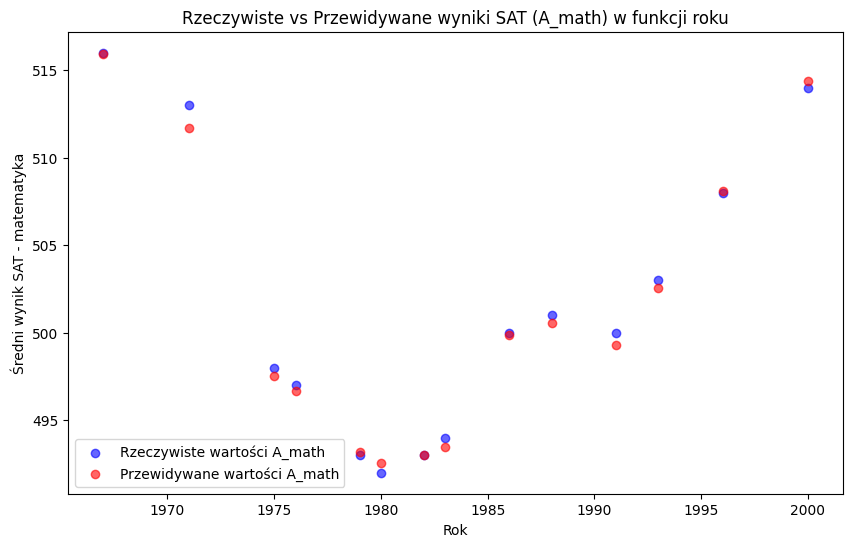

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\SAT_by_Year_Gender_1967_2001.csv'
df = pd.read_csv(csv_path)

# Wybieranie cech i zmiennej docelowej
X = df[['Year','M_math', 'F_math']]
y = df['A_math']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Tworzenie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie i ocena
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))

# Wykres rzeczywistych wartości
plt.scatter(X_test['Year'], y_test, color='blue', label='Rzeczywiste wartości A_math', alpha=0.6)

# Wykres przewidywanych wartości
plt.scatter(X_test['Year'], y_pred, color='red', label='Przewidywane wartości A_math', alpha=0.6)

# Tytuł i etykiety osi
plt.title("Rzeczywiste vs Przewidywane wyniki SAT (A_math) w funkcji roku")
plt.xlabel("Rok")
plt.ylabel("Średni wynik SAT - matematyka")

# Dodanie legendy
plt.legend()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\user_behavior_dataset.csv'
df = pd.read_csv(csv_path)

print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

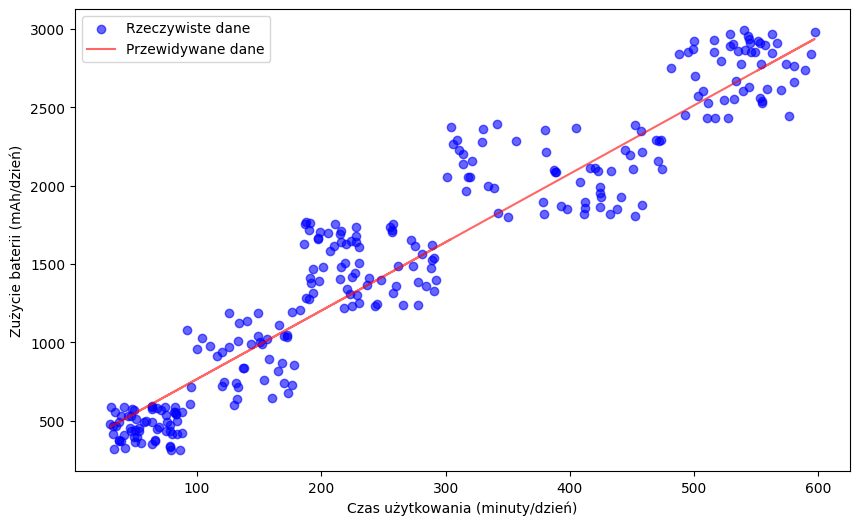

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\user_behavior_dataset.csv'
df = pd.read_csv(csv_path)

# Wybieranie cech i zmiennej docelowej
X = df[['App Usage Time (min/day)']]
y = df['Battery Drain (mAh/day)']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie i ocena
y_pred = model.predict(X_test)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Rzeczywiste wartości
plt.scatter(X_test, y_test, color='blue', label='Rzeczywiste dane', alpha=0.6)

# Przewidywane wartości
plt.plot(X_test, y_pred, color='red', label='Przewidywane dane', alpha=0.6)

# Etykiety osi
plt.xlabel("Czas użytkowania (minuty/dzień)")
plt.ylabel("Zużycie baterii (mAh/dzień)")

# Dodanie legendy
plt.legend()
plt.show()


Mean Squared Error: 2097.6054462668862


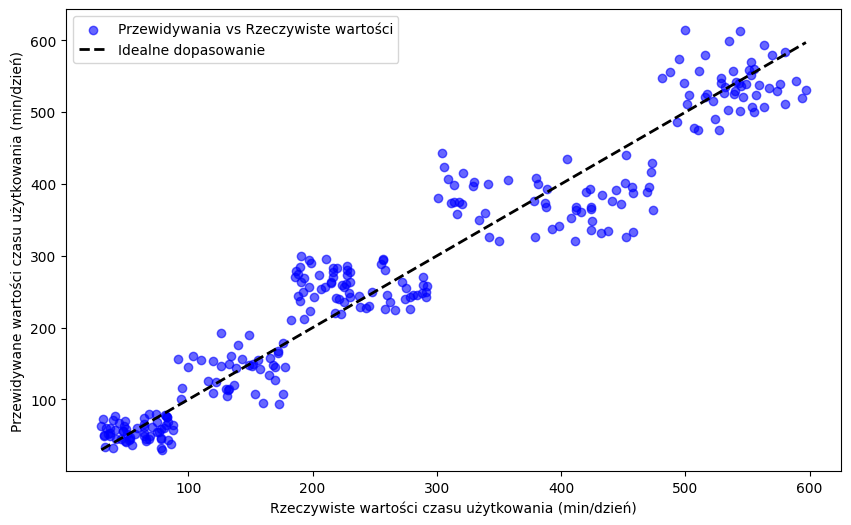

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\user_behavior_dataset.csv'
df = pd.read_csv(csv_path)

X = df[['Data Usage (MB/day)', 'Battery Drain (mAh/day)']]
y = df['App Usage Time (min/day)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Tworzenie modelu regresji liniowej i trenowanie
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Rysowanie rzeczywistych danych vs przewidywane dane
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Przewidywania vs Rzeczywiste wartości')

# Linia referencyjna (y = x), pokazująca idealne dopasowanie
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Idealne dopasowanie')

# Etykiety osi
plt.xlabel("Rzeczywiste wartości czasu użytkowania (min/dzień)")
plt.ylabel("Przewidywane wartości czasu użytkowania (min/dzień)")

# Dodanie legendy
plt.legend()
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Gold  Prices.csv'
df = pd.read_csv(csv_path)

print(df.head())

                        Date        Open        High         Low       Close  \
0  2019-11-11 00:00:00-05:00  137.610001  137.789993  136.440002  137.059998   
1  2019-11-12 00:00:00-05:00  137.029999  137.589996  136.190002  137.429993   
2  2019-11-13 00:00:00-05:00  137.800003  138.220001  137.639999  137.979996   
3  2019-11-14 00:00:00-05:00  138.389999  138.940002  137.869995  138.559998   
4  2019-11-15 00:00:00-05:00  138.029999  138.419998  137.970001  138.210007   

     Volume  Dividends  Stock Splits  Capital Gains  
0   7037300        0.0           0.0            0.0  
1   6448600        0.0           0.0            0.0  
2   8776000        0.0           0.0            0.0  
3   5220500        0.0           0.0            0.0  
4  10106700        0.0           0.0            0.0  


Mean Squared Error: 0.2138190316315053


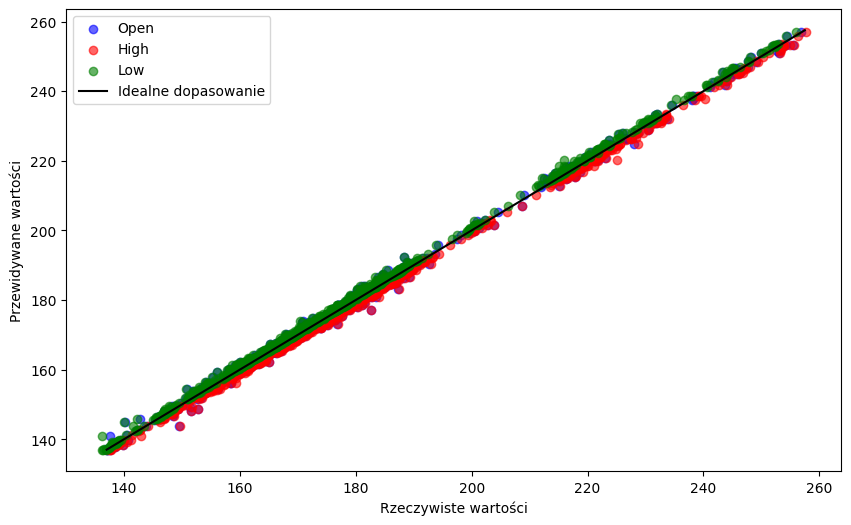

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Gold  Prices.csv'
df = pd.read_csv(csv_path)

# Zamiana kolumny 'Date' na format datetime z ustawieniem na UTC
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Przekształcenie daty na liczbę dni od daty początkowej
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Wybieranie cech i zmiennej docelowej
X = df[['Days', 'Open', 'High', 'Low']]
y = df['Close']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie i obliczanie błędu średniokwadratowego
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Wykres przewidywanych wartości vs rzeczywiste wartości
plt.scatter(X_test['Open'], y_pred, color='blue', alpha=0.6, label='Open')
plt.scatter(X_test['High'], y_pred, color='red', alpha=0.6, label='High')
plt.scatter(X_test['Low'], y_pred, color='green', alpha=0.6, label='Low')

# Linia idealnego dopasowania
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black',label='Idealne dopasowanie')

plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.legend()
plt.show()


Mean Squared Error: 0.2138190316315053


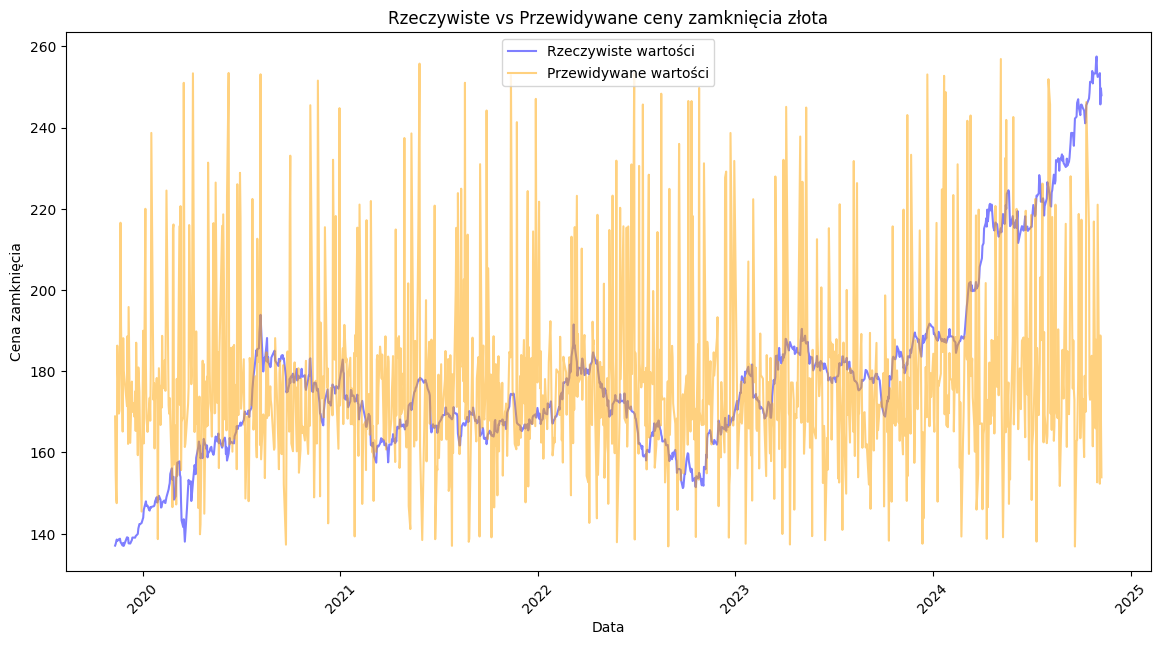

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Gold  Prices.csv'
df = pd.read_csv(csv_path)

# Zamiana kolumny 'Date' na format datetime z ustawieniem na UTC
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Przekształcenie daty na liczbę dni od daty początkowej
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Wybieranie cech i zmiennej docelowej
X = df[['Days', 'Open', 'High', 'Low']]
y = df['Close']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie i obliczanie błędu średniokwadratowego
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Dołączenie dat do zbioru testowego dla wizualizacji
X_test = X_test.copy()
X_test['Date'] = df.loc[X_test.index, 'Date']

# Sortowanie według daty
X_test = X_test.sort_values('Date')
y_test = y_test.loc[X_test.index]
y_pred_sorted = y_pred[X_test.index.argsort()]

# Wizualizacja wyników
plt.figure(figsize=(14, 7))

plt.plot(X_test['Date'], y_test, label='Rzeczywiste wartości', color='blue',alpha = 0.5)
plt.plot(X_test['Date'], y_pred_sorted, label='Przewidywane wartości', color='orange',alpha = 0.5)

plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.title('Rzeczywiste vs Przewidywane ceny zamknięcia złota')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Dog Breads Around The World.csv'
df = pd.read_csv(csv_path)

print(df.head())

               Name       Origin     Type          Unique Feature  \
0     Affenpinscher      Germany      Toy        Monkey-like face   
1      Afghan Hound  Afghanistan    Hound         Long silky coat   
2  Airedale Terrier      England  Terrier     Largest of terriers   
3             Akita        Japan  Working          Strong loyalty   
4  Alaskan Malamute   Alaska USA  Working  Strong pulling ability   

   Friendly Rating (1-10)  Life Span    Size Grooming Needs  \
0                       7         14   Small           High   
1                       5         13   Large      Very High   
2                       8         12  Medium           High   
3                       6         11   Large       Moderate   
4                       7         11   Large           High   

   Exercise Requirements (hrs/day) Good with Children  \
0                              1.5                Yes   
1                              2.0                 No   
2                              2.0 

# DecisionTree


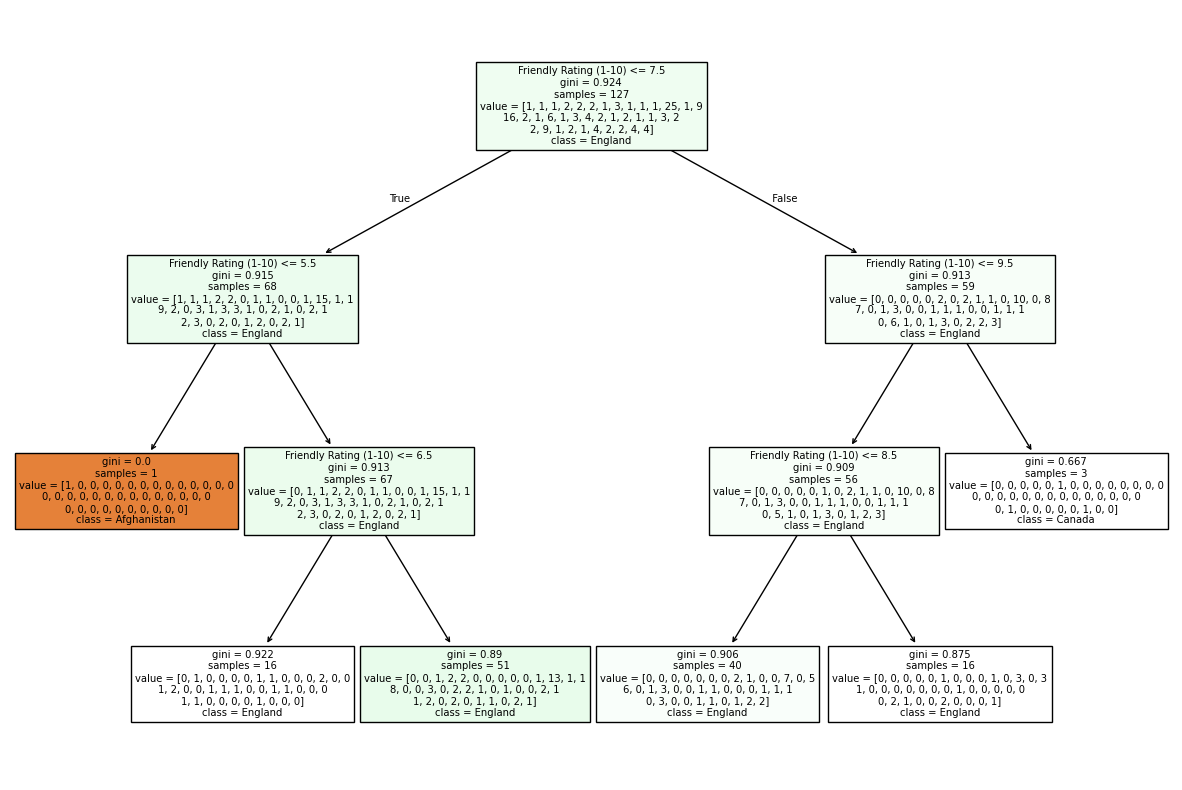

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Dog Breads Around The World.csv'
df = pd.read_csv(csv_path)

# Wybór cech i zmiennej docelowej
X = df[['Friendly Rating (1-10)']]  # X musi być 2D (macierz)
y = df['Origin']  # Zmienna docelowa

# Kodowanie zmiennej kategorycznej na liczby
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=41)

# Tworzenie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Wizualizacja drzewa
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=['Friendly Rating (1-10)'], class_names=label_encoder.classes_, filled=True)
plt.show()


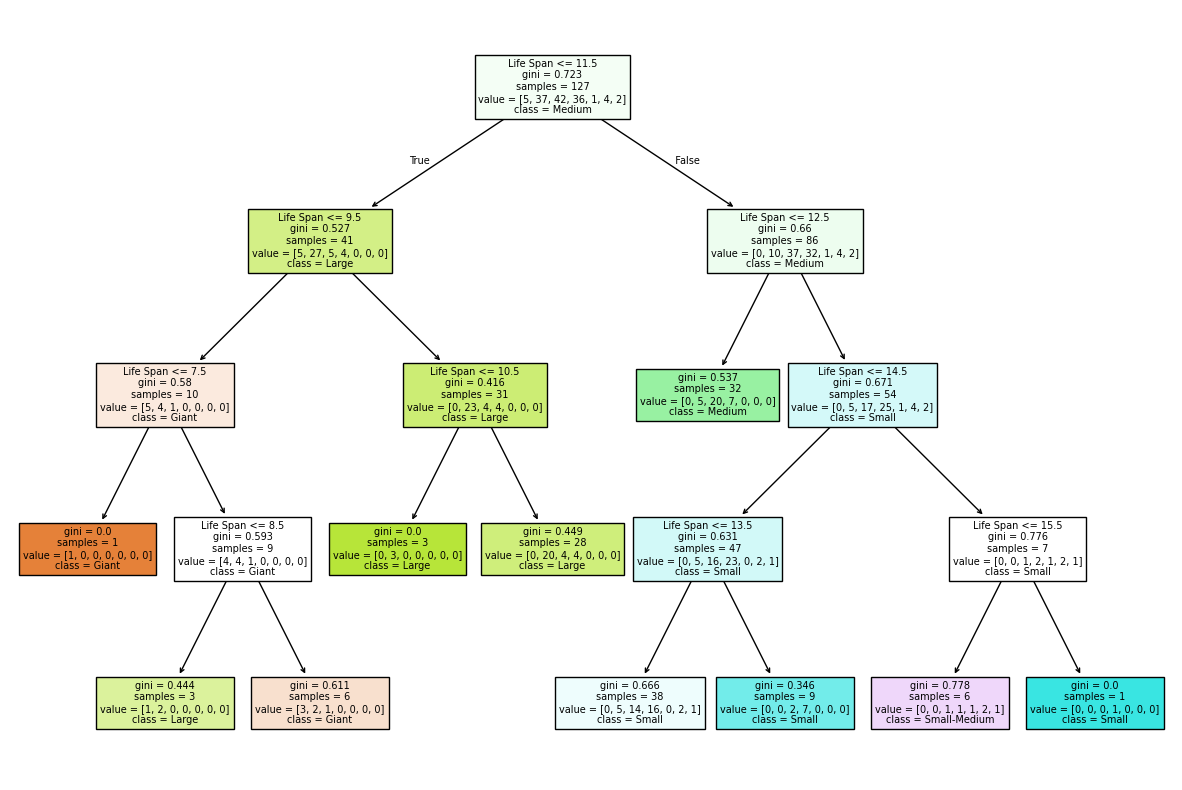

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Dog Breads Around The World.csv'
df = pd.read_csv(csv_path)

# Wybór cech i zmiennej docelowej
X = df[['Life Span']]  # X musi być 2D (macierz)
y = df['Size']  # Zmienna docelowa

# Kodowanie zmiennej kategorycznej na liczby
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=41)

# Tworzenie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Wizualizacja drzewa
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=['Life Span'], class_names=label_encoder.classes_, filled=True)
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Carbon_(CO2)_Emissions_by_Country.csv'
df = pd.read_csv(csv_path)

df.head()


,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Carbon_(CO2)_Emissions_by_Country.csv'
df = pd.read_csv(csv_path)

# Przygotowanie danych
X = df[['Kilotons of Co2']]  # Cecha wejściowa
y = df['Country']  # Zmienna docelowa

# Kodowanie zmiennej docelowej 'Country'
label = LabelEncoder()
y_encoded = label.fit_transform(y)  # Kodowanie etykiet

# Podział danych na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=41)

# Tworzenie i trenowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=['Kilotons of Co2'],
    class_names=label.classes_,  # Użycie poprawnych etykiet klas
    filled=True
)
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

df.head()


,Unnamed: 0,product_name,Price,description,Rating
0,0,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...","₹18,789",8 GB RAM | 256 GB ROM17.07 cm (6.72 inch) Disp...,4.4
1,1,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)","₹19,240",8 GB RAM | 256 GB ROM17.07 cm (6.72 inch) Disp...,4.4
2,2,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)","₹16,999",8 GB RAM | 128 GB ROM17.07 cm (6.72 inch) Disp...,4.4
3,3,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...","₹17,425",8 GB RAM | 128 GB ROM17.07 cm (6.72 inch) Disp...,4.4
4,4,"Motorola g64 5G (Ice Lilac, 256 GB)","₹16,999",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB1...,4.2


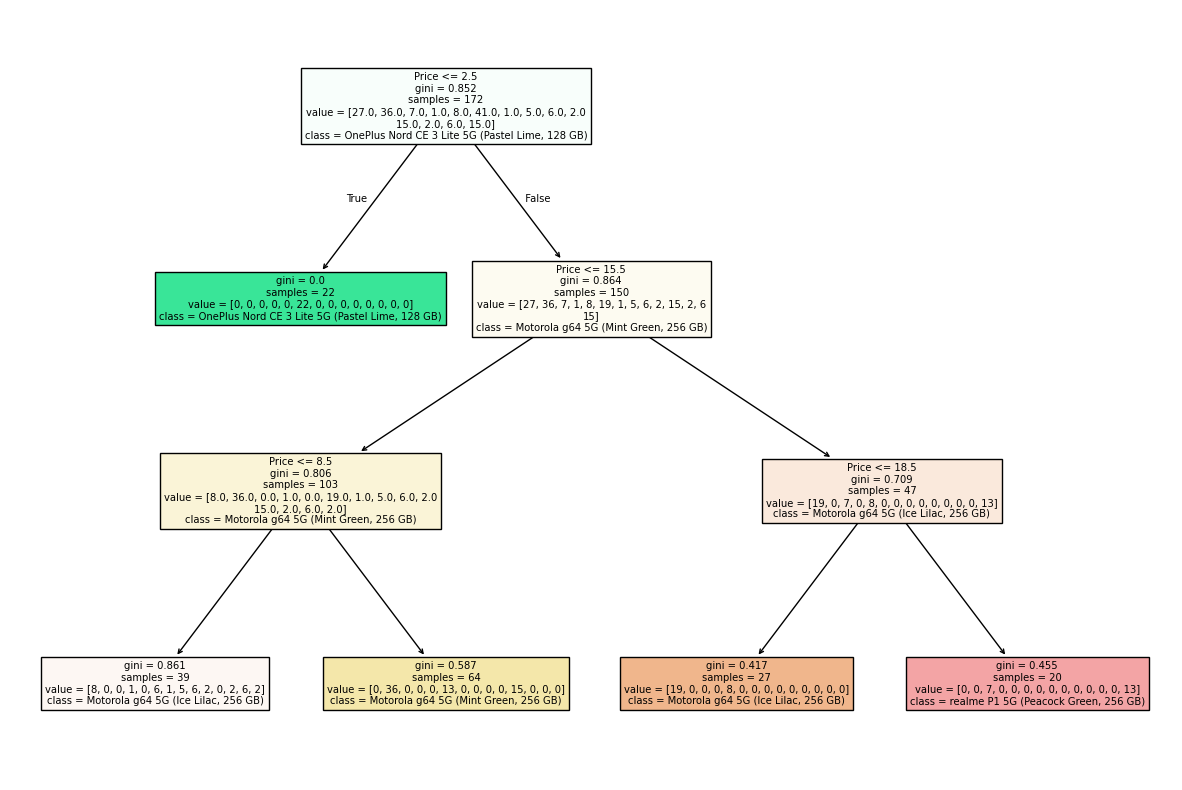

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

# Usuwanie symbolu waluty z kolumny 'Price'
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Przygotowanie cech i zmiennej docelowej
X = df['product_name']  # Cechy
y = df['Price']  # Zmienna docelowa

# Kodowanie cechy 'product_name'
label = LabelEncoder()
X_encoded = label.fit_transform(X)  # Zamiana na liczby

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X_encoded.reshape(-1, 1), y, test_size=0.1, random_state=41)

# Tworzenie i trenowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=['Price'],class_names=label.classes_, filled=True)
plt.show()


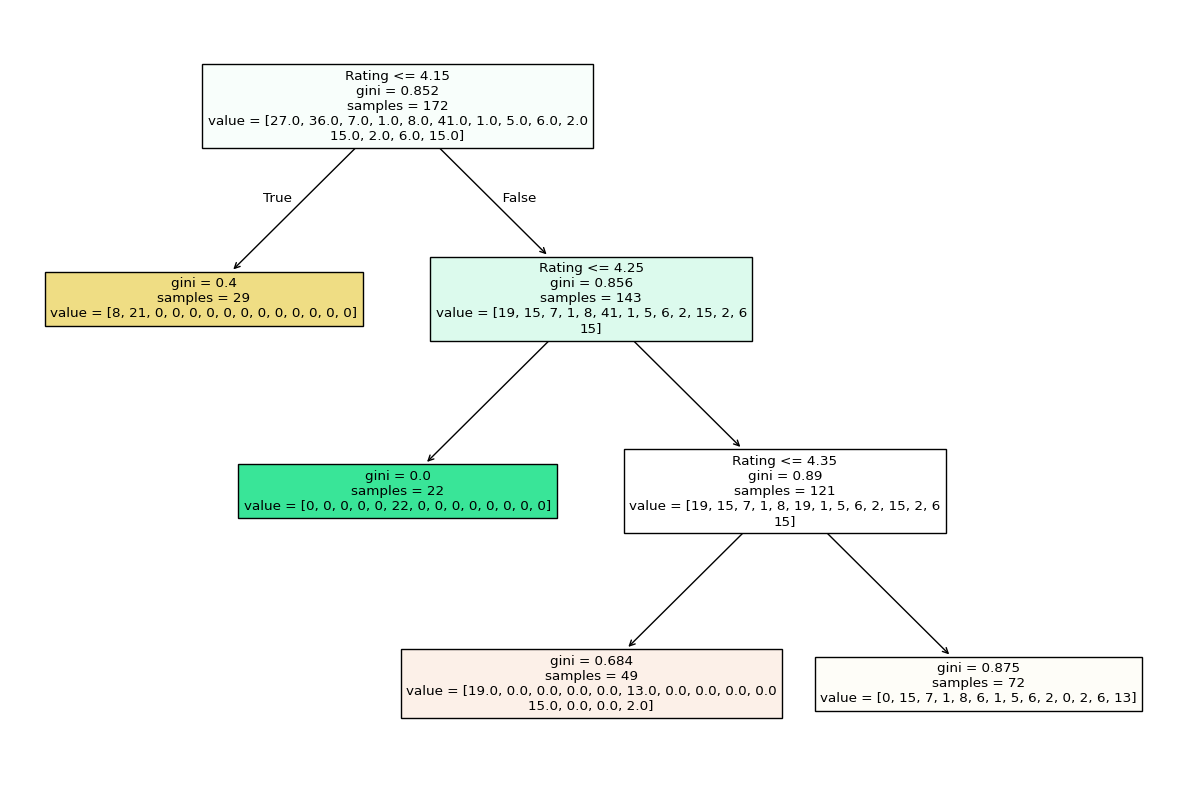

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

# Usuwanie symbolu waluty z kolumny 'Price'
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Przygotowanie cech i zmiennej docelowej
X = df[['Rating']]  # Cechy
y = df['Price']  # Zmienna docelowa

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

# Tworzenie i trenowanie modelu regresji drzewa decyzyjnego
reg = DecisionTreeClassifier(max_depth=3, random_state=41)
reg.fit(X_train, y_train)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(15, 10))
plot_tree(reg, feature_names=['Rating'], filled=True)
plt.show()


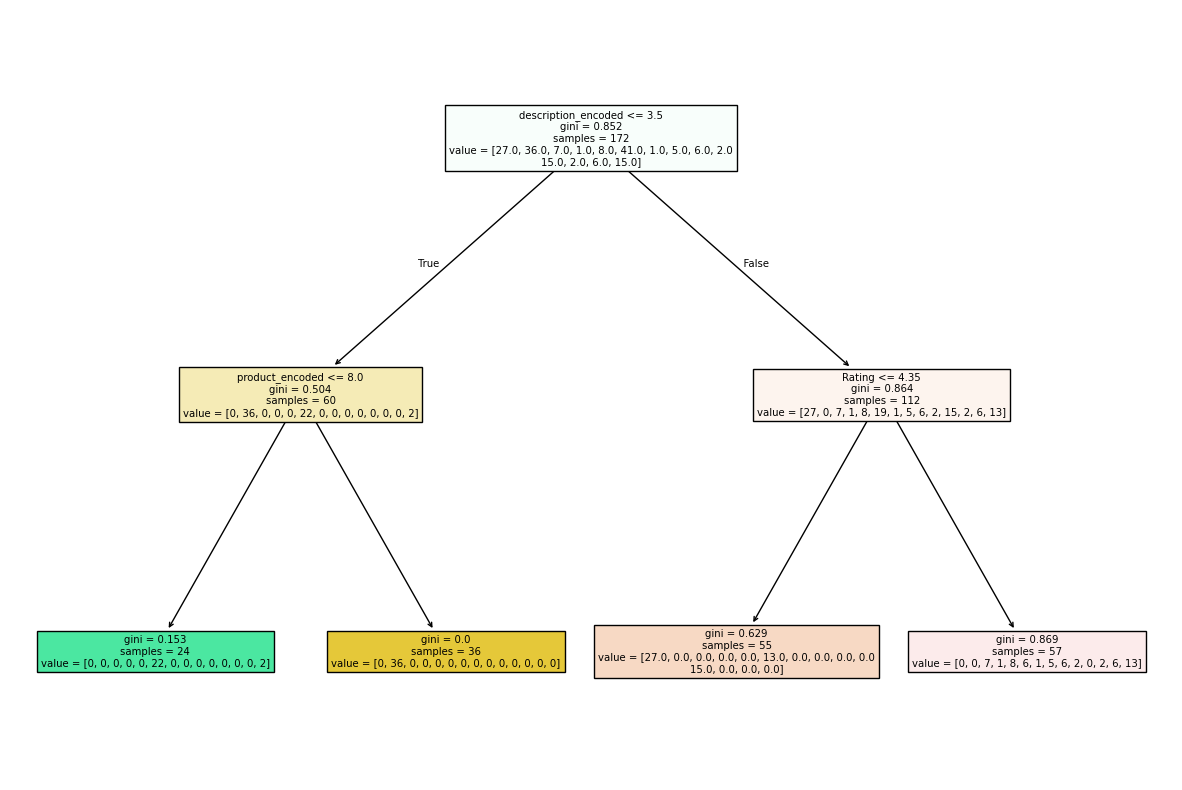

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

# Usuwanie symbolu waluty z kolumny 'Price'
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Kodowanie cech tekstowych
label = LabelEncoder()
df['product_encoded'] = label.fit_transform(df['product_name'])
df['description_encoded'] = label.fit_transform(df['description'])

# Przygotowanie cech i zmiennej docelowej
X = df[['product_encoded', 'description_encoded', 'Rating']]  # Cechy
y = df['Price']  # Zmienna docelowa

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

# Tworzenie i trenowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=X.columns,  # Nazwy cech
    filled=True
)
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\youtube_channel_real_performance_analytics.csv'
df = pd.read_csv(csv_path)

df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


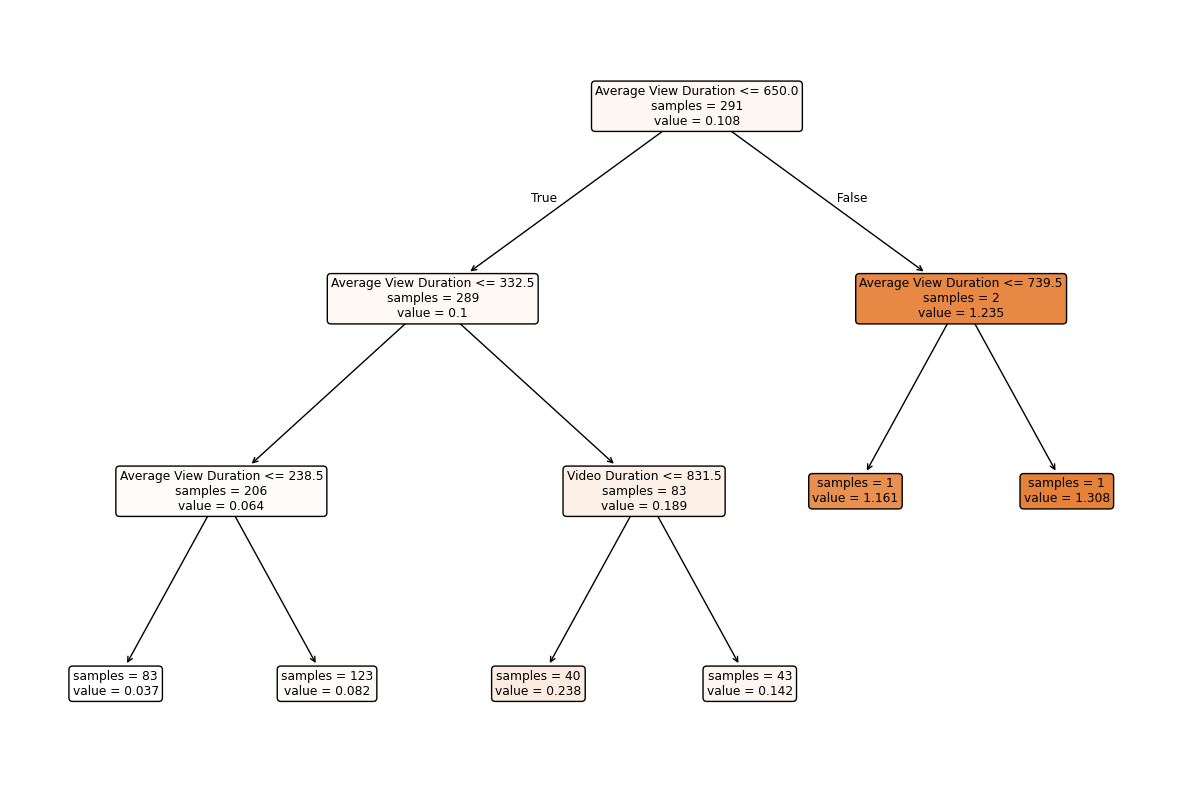

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\youtube_channel_real_performance_analytics.csv'
df = pd.read_csv(csv_path)

X=df[['Watch Time (hours)']]
y=df['Revenue per 1000 Views (USD)']

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

clf=DecisionTreeRegressor(max_depth=3)
clf.fit(X_train,y_train)

plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=X.columns,   # Nazwy cech
    filled=True,               # Kolory zależne od wartości docelowej
    impurity=False,            # Ukrycie informacji o nieczystości w węzłach
    rounded=True,              # Zaokrąglone kształty węzłów
)
plt.show()

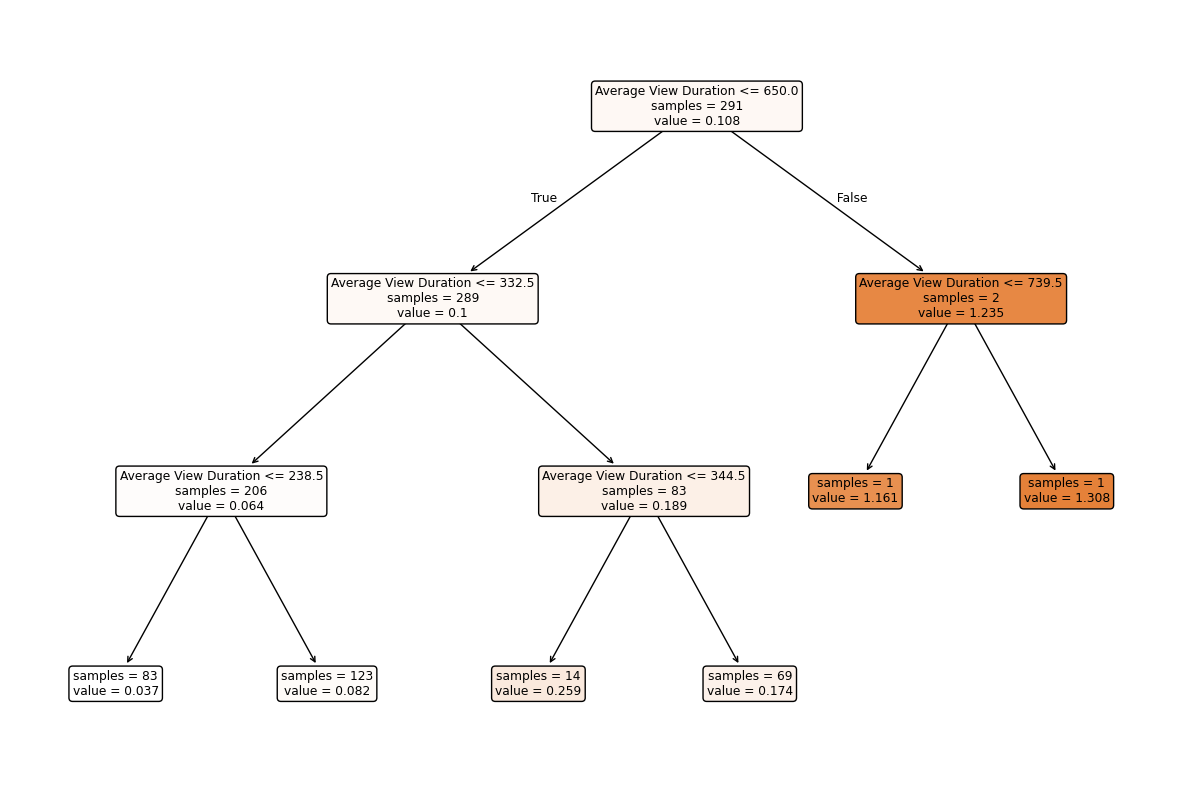

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\youtube_channel_real_performance_analytics.csv'
df = pd.read_csv(csv_path)

X=df[['Average View Duration']]
y=df['Revenue per 1000 Views (USD)']

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

clf=DecisionTreeRegressor(max_depth=3)
clf.fit(X_train,y_train)

plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=X.columns,   # Nazwy cech
    filled=True,               # Kolory zależne od wartości docelowej
    impurity=False,            # Ukrycie informacji o nieczystości w węzłach
    rounded=True,              # Zaokrąglone kształty węzłów
)
plt.show()

# NearestNeighbors

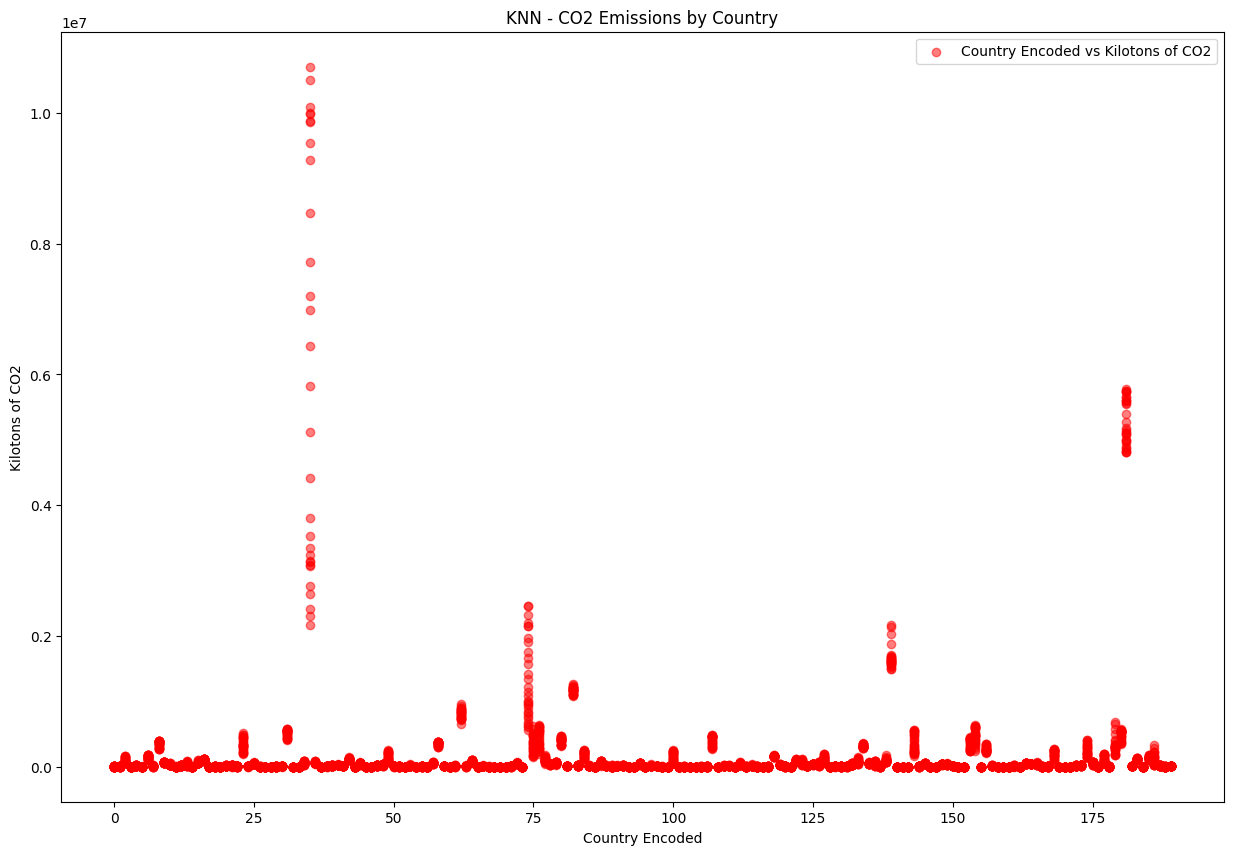

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Carbon_(CO2)_Emissions_by_Country.csv'
df = pd.read_csv(csv_path)

# Kodowanie zmiennych kategorycznych
label = LabelEncoder()
df['Country_encoded'] = label.fit_transform(df['Country'])

# Wybór cech
X = df[['Country_encoded']]
y = df['Kilotons of Co2']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Wizualizacja
plt.figure(figsize=(15, 10))
plt.scatter(X['Country_encoded'], y, c='r', alpha=0.5, label='Country Encoded vs Kilotons of CO2')
plt.title('KNN - CO2 Emissions by Country')
plt.xlabel('Country Encoded')
plt.ylabel('Kilotons of CO2')
plt.legend()
plt.show()


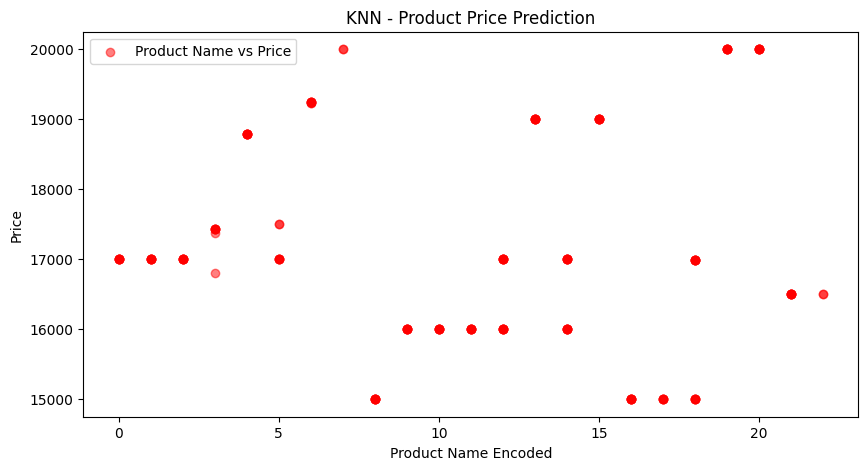

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

# Czyszczenie i konwersja ceny
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Kodowanie zmiennej 'product_name'
label = LabelEncoder()
df['product_name_encoded'] = label.fit_transform(df['product_name'])

# Wybór cech
X = df[['product_name_encoded']]  # Kategoria produktu
y = df['Price']  # Cena

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

# Wizualizacja
plt.figure(figsize=(10, 5))
plt.scatter(X['product_name_encoded'], y, c='r', alpha=0.5, label='Product Name vs Price')
plt.xlabel('Product Name Encoded')
plt.ylabel('Price')
plt.title('KNN - Product Price Prediction')
plt.legend()
plt.show()


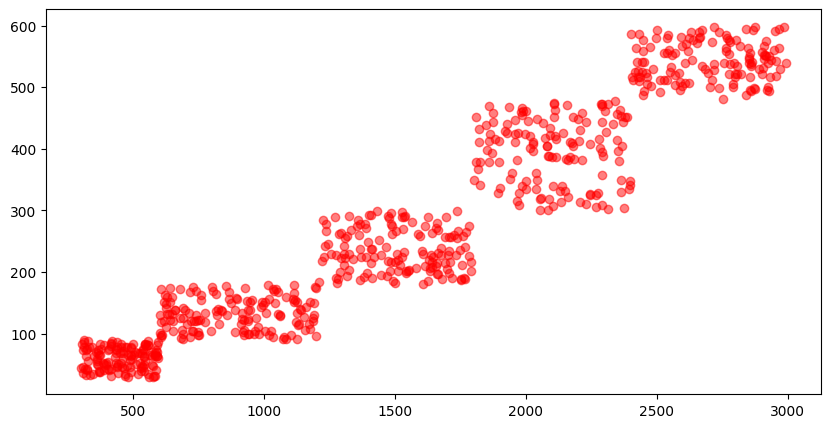

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\user_behavior_dataset.csv'
df = pd.read_csv(csv_path)

X=df[['Battery Drain (mAh/day)']]
y=df['App Usage Time (min/day)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

nbrs=NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

plt.figure(figsize=(10,5))
plt.scatter(X['Battery Drain (mAh/day)'], y,c='r',alpha=0.5)
plt.show()

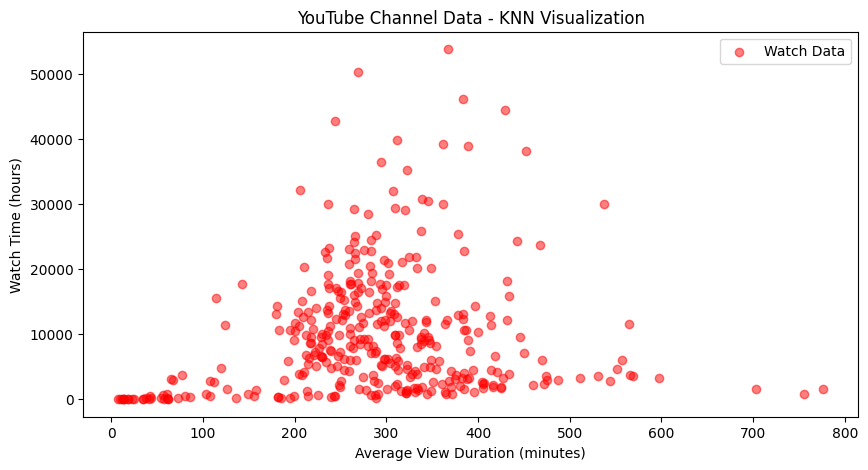

In [33]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\youtube_channel_real_performance_analytics.csv'
df = pd.read_csv(csv_path)

# Wybór cech i celu
X = df[['Average View Duration', 'Watch Time (hours)']]
y = df['Revenue per 1000 Views (USD)']

# KNN - Szukanie sąsiadów
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)

# Wizualizacja
plt.figure(figsize=(10, 5))
plt.scatter(X['Average View Duration'], X['Watch Time (hours)'], c='r', alpha=0.5, label='Watch Data')
plt.xlabel('Average View Duration (minutes)')
plt.ylabel('Watch Time (hours)')
plt.title('YouTube Channel Data - KNN Visualization')
plt.legend()
plt.show()


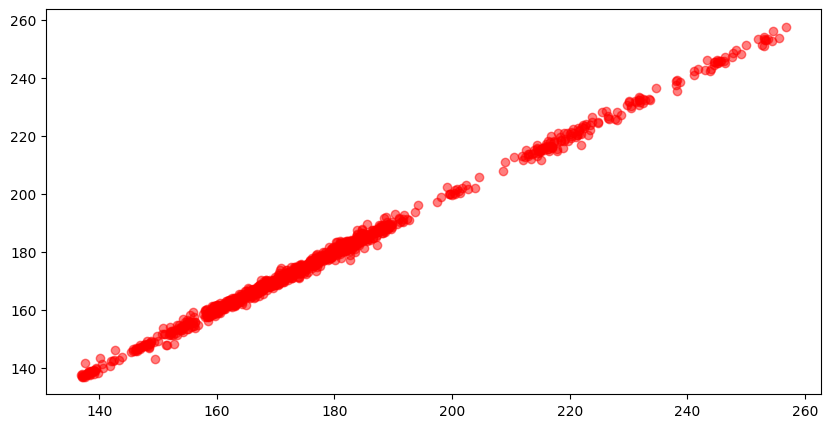

In [40]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Gold_Prices.csv'
df = pd.read_csv(csv_path)

X=df[['Open','High','Low','Close']]
y=df['Date']

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

plt.figure(figsize=(10,5))
plt.scatter(X['Open'],X['Close'],c='r',alpha=0.5)
plt.show()

## fajne oznaczenie

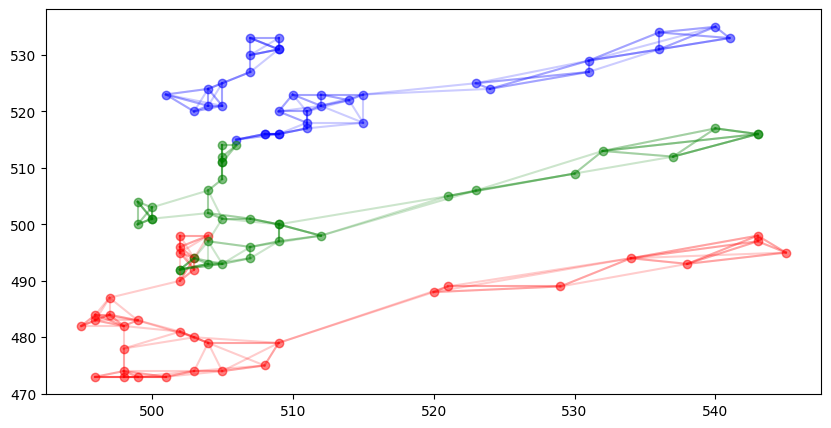

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\SAT_by_Year_Gender_1967_2001.csv'
df = pd.read_csv(csv_path)

Xm=df[['M_verbal','M_math']].dropna()
ym=df['M_averages'].dropna()

Xf=df[['F_verbal','F_math']].dropna()
yf=df['F_averages'].dropna()

Xa=df[['A_verbal','A_math']].dropna()
ya=df['A_averages'].dropna()

knn_m=NearestNeighbors(n_neighbors=5).fit(Xm)
knn_f=NearestNeighbors(n_neighbors=5).fit(Xf)
knn_a=NearestNeighbors(n_neighbors=5).fit(Xa)

distances_m, indices_m = knn_m.kneighbors(Xm)
distances_f, indices_f = knn_f.kneighbors(Xf)
distances_a, indices_a = knn_a.kneighbors(Xa)

plt.figure(figsize=(10,5))
plt.scatter(Xm['M_verbal'], Xm['M_math'], c='b', alpha=0.5, label='Males (Verbal vs Math)')
for i in range(len(Xm)):
    for neighbor in indices_m[i]:
        plt.plot(
            [Xm.iloc[i, 0], Xm.iloc[neighbor, 0]],
            [Xm.iloc[i, 1], Xm.iloc[neighbor, 1]],
            c='b', alpha=0.2
        )

plt.scatter(Xf['F_verbal'], Xf['F_math'], c='r', alpha=0.5, label='females (Verbal vs Math)')
for i in range(len(Xf)):
    for neighbor in indices_f[i]:
        plt.plot(
            [Xf.iloc[i, 0], Xf.iloc[neighbor, 0]],
            [Xf.iloc[i, 1], Xf.iloc[neighbor, 1]],
            c='r', alpha=0.2
        )

plt.scatter(Xa['A_verbal'], Xa['A_math'], c='g', alpha=0.5, label='average (Verbal vs Math)')
for i in range(len(Xa)):
    for neighbor in indices_a[i]:
        plt.plot(
            [Xa.iloc[i, 0], Xa.iloc[neighbor, 0]],
            [Xa.iloc[i, 1], Xa.iloc[neighbor, 1]],
            c='g', alpha=0.2
        )
plt.show()

# Support Vector Machines (SVM)

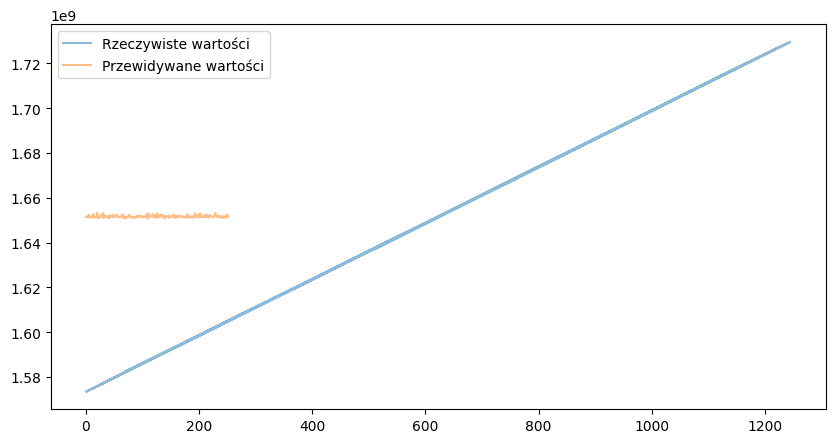

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Gold_Prices.csv'
df = pd.read_csv(csv_path)

# Wybór cech (Open, Close) i etykiety (Date)
X = df[['Open', 'Close']]
y = pd.to_datetime(df['Date'], utc=True).astype(int) / 10**9

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Tworzenie modelu regresji z użyciem SVR
clf = SVR(kernel='linear')  # Wybór liniowego jądra
clf.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = clf.predict(X_test)

# Możesz wykonać wykres porównawczy rzeczywistych i przewidywanych wartości
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Rzeczywiste wartości',alpha=0.5)
plt.plot(y_pred, label='Przewidywane wartości',alpha=0.5)
plt.legend()
plt.show()


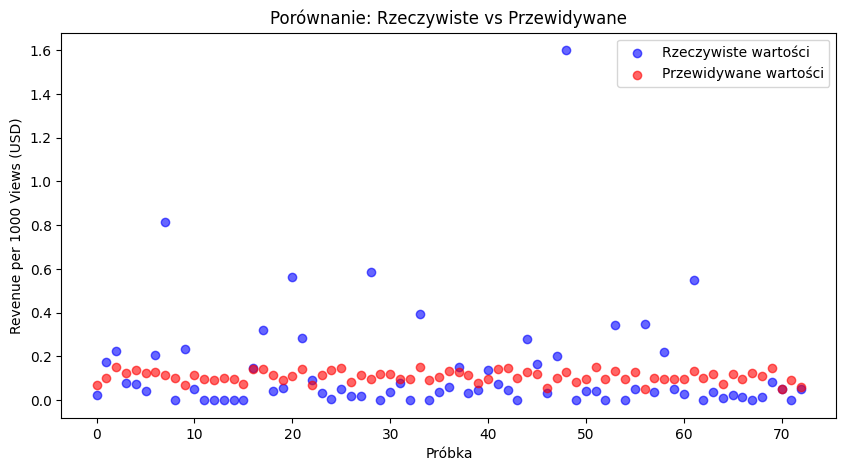

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\youtube_channel_real_performance_analytics.csv'
df = pd.read_csv(csv_path)

df.head()

X=df[['Watch Time (hours)','Year']]
y=df['Revenue per 1000 Views (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

clf=SVR(kernel='rbf')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Rzeczywiste wartości', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Przewidywane wartości', alpha=0.6)
plt.xlabel('Próbka')
plt.ylabel('Revenue per 1000 Views (USD)')
plt.title('Porównanie: Rzeczywiste vs Przewidywane')
plt.legend()

=== Ocena modelu ===
Mean Squared Error: 2187612.59
Mean Absolute Error: 1059.97
R² Score: 0.00


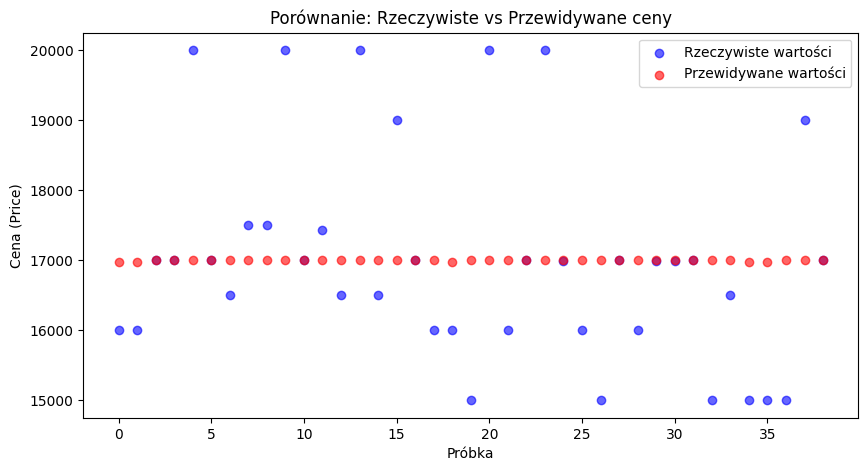

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

# Czyszczenie kolumny 'Price'
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Przygotowanie danych
X = df[['Rating']]
y = df['Price']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Dopasowanie modelu
clf = SVR(kernel='rbf')
clf.fit(X_train, y_train)

# Przewidywanie
y_pred = clf.predict(X_test)

# Wyświetlanie wyników
print("=== Ocena modelu ===")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Wizualizacja
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Rzeczywiste wartości', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Przewidywane wartości', alpha=0.6)
plt.xlabel('Próbka')
plt.ylabel('Cena (Price)')
plt.title('Porównanie: Rzeczywiste vs Przewidywane ceny')
plt.legend()
plt.show()


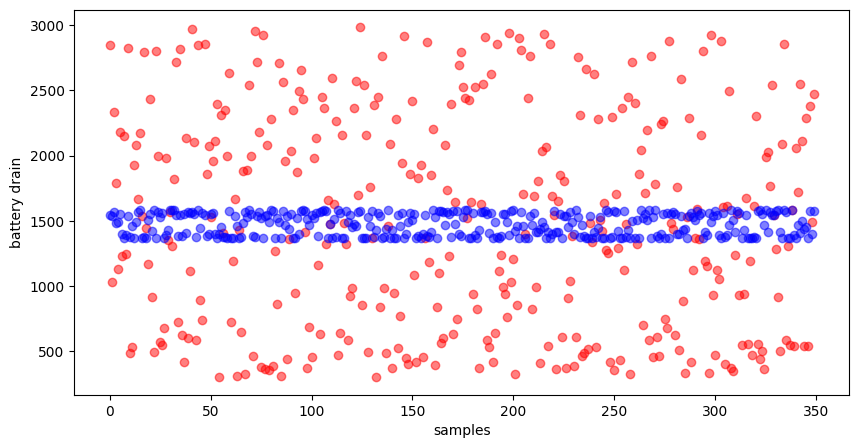

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\user_behavior_dataset.csv'
df = pd.read_csv(csv_path)

X=df[['Screen On Time (hours/day)']]
y=df['Battery Drain (mAh/day)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=41)

clf=SVR(kernel='rbf')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(range(len(y_train)),y_train ,c='r',label='samples',alpha=0.5)
plt.scatter(range(len(y_pred)),y_pred ,c='b',label='battery drain',alpha=0.5)
plt.xlabel('samples')
plt.ylabel('battery drain')
plt.legend
plt.show()

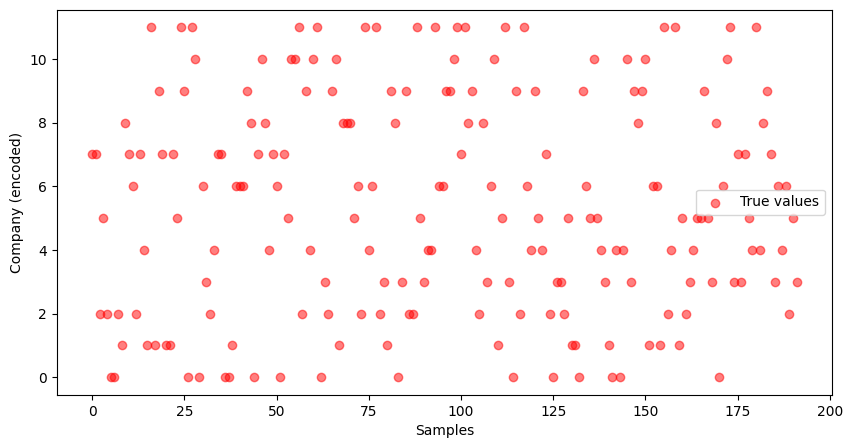

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmyhm\archive\Top_12_German_Companies_NEW.csv'
df = pd.read_csv(csv_path)

# Usunięcie przecinków z liczb w odpowiednich kolumnach i konwersja na typ float
df['ROA (%)'] = df['ROA (%)'].str.replace('.', '').astype(float)
df['ROE (%)'] = df['ROE (%)'].str.replace('.', '').astype(float)

# Zakodowanie nazw firm
label = LabelEncoder()
df['encodedcompany'] = label.fit_transform(df['Company'])

# Przygotowanie cech wejściowych i celu
X = df[['ROA (%)', 'ROE (%)']]
y = df['encodedcompany']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, train_size=0.5)

# Utworzenie modelu i jego trenowanie
clf = SVR(kernel='rbf')
clf.fit(X_train, y_train)

# Wizualizacja
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_train)), y_train, c='r', label='True values',alpha=0.5)
plt.xlabel('Samples')
plt.ylabel('Company (encoded)')
plt.legend()
plt.show()

# Gaussian (attempt)

C:\Users\USER098\Desktop\llmy\venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Dokładność modelu (R^2): -62.96


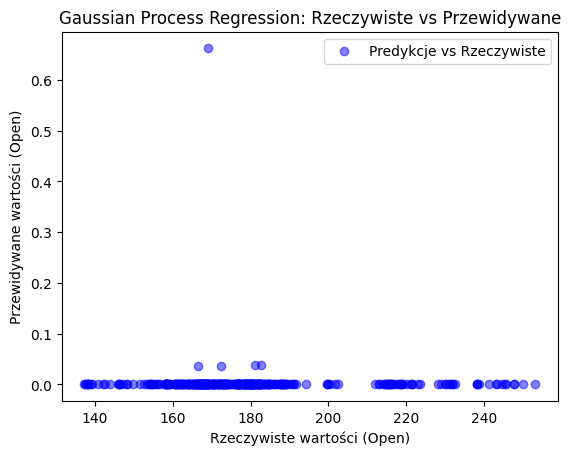

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process.kernels import Matern


# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmy\archive\Gold_Prices.csv'
df = pd.read_csv(csv_path)

# Wybór cech (X) i zmiennej docelowej (y)
X = df[['High', 'Low']]  # Poprawione: użycie podwójnych nawiasów
y = df['Open']

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

# Standaryzacja danych (opcjonalne, ale zalecane)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


kernel = C(1.0, (1e-2, 1e5)) * Matern(length_scale=1.0, nu=1.5, length_scale_bounds=(1e-4, 1e3))

gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Trenowanie modelu
gpr.fit(X_train_scaled, y_train)

# Ocena modelu
score = gpr.score(X_test_scaled, y_test)
print(f"Dokładność modelu (R^2): {score:.2f}")

# Wizualizacja predykcji (przykład dla pierwszej cechy)
y_pred = gpr.predict(X_test_scaled)

plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predykcje vs Rzeczywiste')
plt.xlabel('Rzeczywiste wartości (Open)')
plt.ylabel('Przewidywane wartości (Open)')
plt.legend()
plt.title('Gaussian Process Regression: Rzeczywiste vs Przewidywane')
plt.show()


R²: -53.36
RMSE: 0.82


C:\Users\USER098\Desktop\llmy\venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


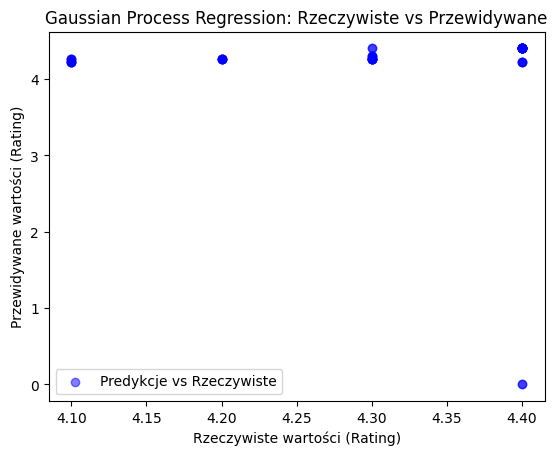

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmy\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

# Przetwarzanie kolumny 'Price'
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Wybór cech i zmiennej docelowej
X = df['Price'].values.reshape(-1, 1)  # Przekształcenie na macierz
y = df['Rating']

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

# Standaryzacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definicja i trenowanie modelu
kernel = RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=41)

gpr.fit(X_train_scaled, y_train)

# Ocena modelu
score = gpr.score(X_test_scaled, y_test)
print(f"R²: {score:.2f}")

# Obliczenie RMSE
y_pred = gpr.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Wizualizacja wyników
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predykcje vs Rzeczywiste')
plt.xlabel('Rzeczywiste wartości (Rating)')
plt.ylabel('Przewidywane wartości (Rating)')
plt.legend()
plt.title('Gaussian Process Regression: Rzeczywiste vs Przewidywane')
plt.show()


# Random Forest + Cross Validation + str.extract 

korelacja
            Price    Camera   Battery    Rating
Price    1.000000 -0.069628 -0.072842  0.444725
Camera  -0.069628  1.000000 -0.332145 -0.300939
Battery -0.072842 -0.332145  1.000000 -0.160024
Rating   0.444725 -0.300939 -0.160024  1.000000
Cross-Validation R^2 Scores: [0.99520285 0.99210806 0.99745242 0.99356249 0.98463378]
Srednie R^2: 0.99
Dyspersja wyników (odchylenie standardowe): 0.00
R^2: 0.98
Mean Absolute Error: 0.01


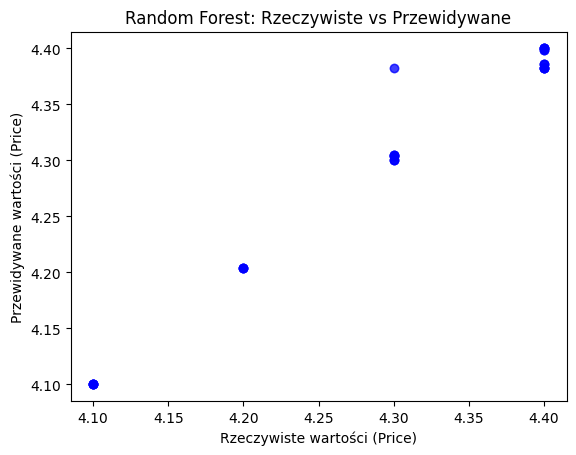

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie danych
csv_path = r'C:\Users\USER098\Desktop\llmy\archive\phone_under_20K.csv'
df = pd.read_csv(csv_path)

# Czyszczenie kolumny Price
df['Price'] = df['Price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True).astype(float)

# r (string) | (\d+) (liczba przed MP) | \s* (bialy znak mp spacja)  | [mM]?[aA]?[hH] (duze lub male litery w danych nie dzialalo inaczej)
df['Camera'] = df['description'].str.extract(r'(\d+)\s*MP').astype(float)
df['Battery'] = df['description'].str.extract(r'(\d+)\s*[mM]?[aA]?[hH]\s*')

# Zamiast NaN przypiszemy medianę dla kamery i 5000 dla baterii
df['Camera'] = df['Camera'].fillna(df['Camera'].median())

# Przygotowanie zmiennych X i y
X = df[['Price','Camera','Battery']]  # Rating jako DataFrame
y = df['Rating']

print('korelacja')
print(f'{df[['Price', 'Camera', 'Battery', 'Rating']].corr()}')

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)


# Model Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=41)

# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=41)
cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='r2')

# Wyniki cross-validation
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Srednie R^2: {np.mean(cv_scores):.2f}')
print(f'Dyspersja wyników (odchylenie standardowe): {np.std(cv_scores):.2f}')

# Trening modelu i predykcja
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Wyniki na zbiorze testowym
print(f'R^2: {rf.score(X_test, y_test):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

# Wizualizacja wyników
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Rzeczywiste wartości (Price)')
plt.ylabel('Przewidywane wartości (Price)')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')
plt.show()


korelacja
           Open      High       Low     Close
Open   1.000000  0.999473  0.999334  0.998779
High   0.999473  1.000000  0.999232  0.999433
Low    0.999334  0.999232  1.000000  0.999500
Close  0.998779  0.999433  0.999500  1.000000
Cross-Validation R^2 Scores: [0.99589666 0.99583562 0.99654242 0.99674471 0.99434079]
Srednie R^2: 1.00
Dyspersja wyników (odchylenie standardowe): 0.00
R^2: 1.00
Mean Absolute Error: 1.14


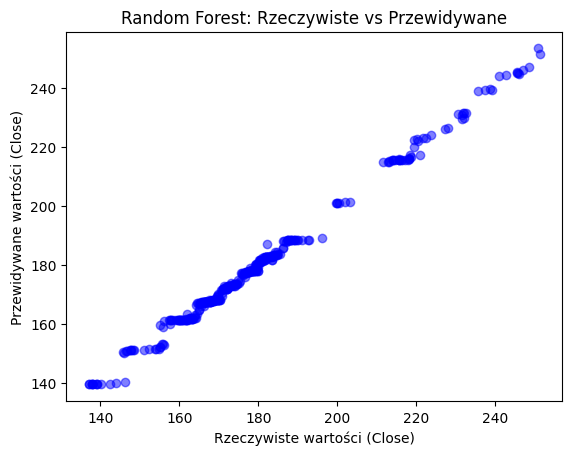

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\Gold_Prices.csv'
df = pd.read_csv(csv_path)

X = df[['Open', 'High', 'Low']]  
y = df['Close']

print('korelacja')
correlation = df[['Open', 'High', 'Low', 'Close']].corr()
print(correlation)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

rf=RandomForestRegressor(n_estimators=100,max_depth=4,random_state=41)

kfold = KFold(n_splits=5, shuffle=True, random_state=41)

cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='r2')  # Użycie R^2 jako miary
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Srednie R^2: {np.mean(cv_scores):.2f}')
print(f'Dyspersja wyników (odchylenie standardowe): {np.std(cv_scores):.2f}')

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(f'R^2: {rf.score(X_test, y_test):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Rzeczywiste wartości (Close)')
plt.ylabel('Przewidywane wartości (Close)')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')
plt.show()

            M_averages  F_averages  A_averages
M_averages    1.000000    0.975213    0.990015
F_averages    0.975213    1.000000    0.995401
A_averages    0.990015    0.995401    1.000000
Cross-Validation R^2 Scores: [0.77906977 0.96190858 0.99601117 0.91463415 0.90569293]
Srednie R^2: 0.91
Dyspersja wyników (odchylenie standardowe): 0.07
R^2: 0.36
Mean Absolute Error: 1.00


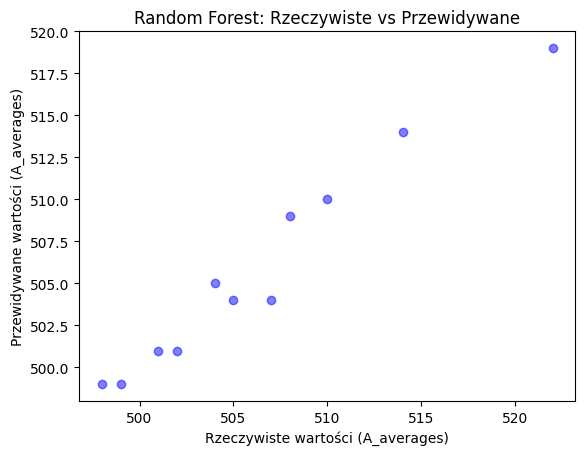

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler #standaryzacja
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder #zamiana string na num
import matplotlib.pyplot as plt 
import numpy as np 
# ctrl + / by komentowac

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\SAT_by_Year_Gender_1967_2001.csv'
df = pd.read_csv(csv_path)

X=df[['M_averages','F_averages']]
y=df['A_averages']

corell=df[['M_averages','F_averages','A_averages']].corr()
print(corell)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

rfc=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=41)

kfold=KFold(n_splits=5,shuffle=True,random_state=41)
walidacja=cross_val_score(rfc,X_train,y_train,cv=kfold,scoring='r2')
print(f'Cross-Validation R^2 Scores: {walidacja}')
print(f'Srednie R^2: {np.mean(walidacja):.2f}')
print(f'Dyspersja wyników (odchylenie standardowe): {np.std(walidacja):.2f}')

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print(f'R^2: {rfc.score(X_test, y_test):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Rzeczywiste wartości (A_averages)')
plt.ylabel('Przewidywane wartości (A_averages)')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')
plt.show()

                             average_score  parental_level_of_education  \
average_score                     1.000000                    -0.078883   
parental_level_of_education      -0.078883                     1.000000   
race_ethnicity                    0.185168                    -0.031946   
gender                           -0.130861                     0.001913   
lunch                             0.290064                     0.006320   

                             race_ethnicity    gender     lunch  
average_score                      0.185168 -0.130861  0.290064  
parental_level_of_education       -0.031946  0.001913  0.006320  
race_ethnicity                     1.000000 -0.001502  0.046563  
gender                            -0.001502  1.000000  0.021372  
lunch                              0.046563  0.021372  1.000000  
Accuracy: 0.69
[0.72  0.73  0.675 0.655 0.695]
z szumem


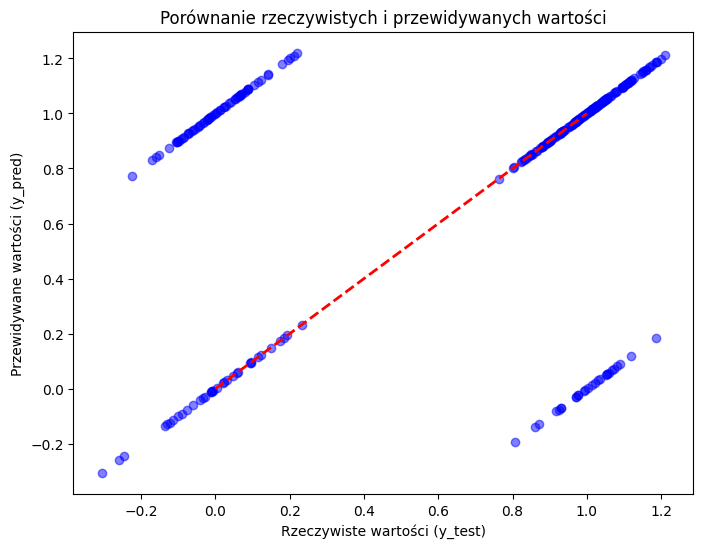

bez szumu


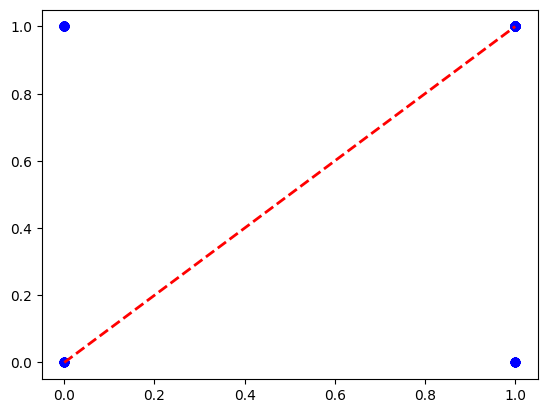

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler #standaryzacja
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder #zamiana string na num
import matplotlib.pyplot as plt 
import numpy as np 
# ctrl + / by komentowac

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\Cleaned_Students_Performance.csv'
df = pd.read_csv(csv_path)

le=LabelEncoder()
df['parental_level_of_education']=le.fit_transform(df['parental_level_of_education'])
df['race_ethnicity']=le.fit_transform(df['race_ethnicity'])

X = df[['math_score', 'reading_score', 'writing_score', 'average_score']]
y = df['lunch']

corell=df[['average_score','parental_level_of_education','race_ethnicity','gender','lunch']].corr()
print(corell)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

rf=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=41)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print(f'Accuracy: {accuracy:.2f}')

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(scores)

print('z szumem')
plt.figure(figsize=(8, 6))
noise = np.random.normal(0, 0.1, size=len(y_test))  # Dodanie małego szumu
plt.scatter(y_test + noise, y_pred + noise, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Rzeczywiste wartości (y_test)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.title('Porównanie rzeczywistych i przewidywanych wartości')
plt.show()

print('bez szumu')
plt.scatter(y_test , y_pred  , color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, linestyle='--')
plt.show()

Cross-Validation R^2 Scores: [0.98048473 0.97431316 0.98138965 0.98592861 0.97068992]
Srednie R^2: 0.98
R^2: 0.98
Mean Absolute Error: 1.40


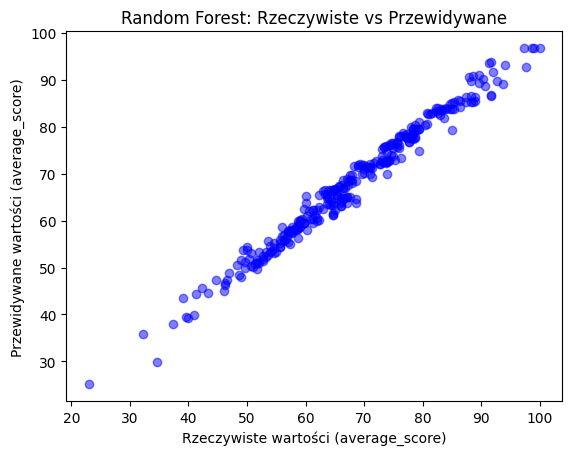

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler #standaryzacja
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder #zamiana string na num
import matplotlib.pyplot as plt 
import numpy as np 
# ctrl + / by komentowac

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\Cleaned_Students_Performance.csv'
df = pd.read_csv(csv_path)

X = df[['math_score', 'reading_score', 'writing_score']]
y = df['average_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

rf=RandomForestRegressor(n_estimators=100,max_depth=4,random_state=41)

kfold=KFold(n_splits=5,shuffle=True,random_state=41)
walidacja=cross_val_score(rf,X_train,y_train,cv=kfold,scoring='r2')
print(f'Cross-Validation R^2 Scores: {walidacja}')
print(f'Srednie R^2: {np.mean(walidacja):.2f}')

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(f'R^2: {rf.score(X_test, y_test):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Rzeczywiste wartości (average_score)')
plt.ylabel('Przewidywane wartości (average_score)')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')
plt.show()

                            Training Difficulty (1-10)  Good with Children  \
Training Difficulty (1-10)                    1.000000           -0.444133   
Good with Children                           -0.444133            1.000000   
Friendly Rating (1-10)                       -0.748909            0.532324   
Intelligence Rating (1-10)                   -0.344985            0.188325   

                            Friendly Rating (1-10)  Intelligence Rating (1-10)  
Training Difficulty (1-10)               -0.748909                   -0.344985  
Good with Children                        0.532324                    0.188325  
Friendly Rating (1-10)                    1.000000                    0.356066  
Intelligence Rating (1-10)                0.356066                    1.000000  
R^2 on test set: 0.23647701662778786
walidacja
Cross-Validation R^2 Scores: [ 0.14541708 -0.00409876 -0.19314122  0.02091826 -0.1508009 ]
R^2: 0.24
Mean Absolute Error: 0.66


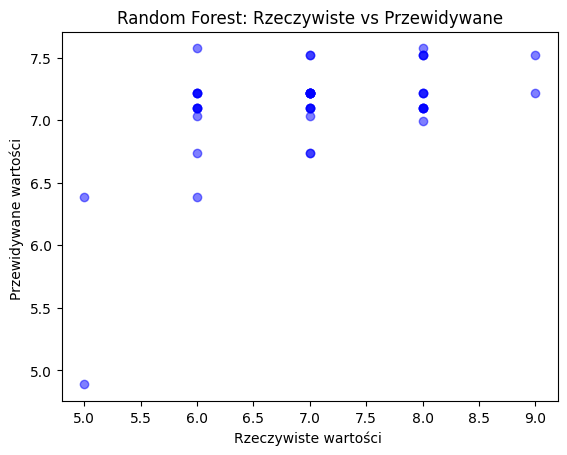

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler #standaryzacja
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder #zamiana string na num
import matplotlib.pyplot as plt 
import numpy as np 
# ctrl + / by komentowac

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\Dog Breads Around The World.csv'
df = pd.read_csv(csv_path)

le=LabelEncoder()
df['Good with Children']=le.fit_transform(df['Good with Children'])

X=df[['Good with Children','Friendly Rating (1-10)']]
y=df['Intelligence Rating (1-10)']

coreelation=df[['Training Difficulty (1-10)','Good with Children','Friendly Rating (1-10)','Intelligence Rating (1-10)']].corr()
print(coreelation)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)
rf=RandomForestRegressor(n_estimators=100,max_depth=10,random_state=41)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(f"R^2 on test set: {r2_test}")

kfold=KFold(n_splits=5,shuffle=True,random_state=41)
walidacja=cross_val_score(rf,X_train,y_train,cv=kfold,scoring='r2')

print('walidacja')
print(f'Cross-Validation R^2 Scores: {walidacja}')

print(f'R^2: {rf.score(X_test, y_test):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Rzeczywiste wartości ')
plt.ylabel('Przewidywane wartości ')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')
plt.show()


                                  Year  Watch Time scaled     Views  \
Year                          1.000000          -0.103641 -0.203715   
Watch Time scaled            -0.103641           1.000000  0.931054   
Views                        -0.203715           0.931054  1.000000   
Revenue per 1000 Views (USD)  0.549695          -0.197088 -0.264912   

                              Revenue per 1000 Views (USD)  
Year                                              0.549695  
Watch Time scaled                                -0.197088  
Views                                            -0.264912  
Revenue per 1000 Views (USD)                      1.000000  
R^2 on test set: 0.5389918999178946
walidacja
Cross-Validation R^2 Scores: [0.59851821 0.39688677 0.36958629 0.43030206 0.27794112]
R^2: 0.54
Mean Absolute Error: 0.08


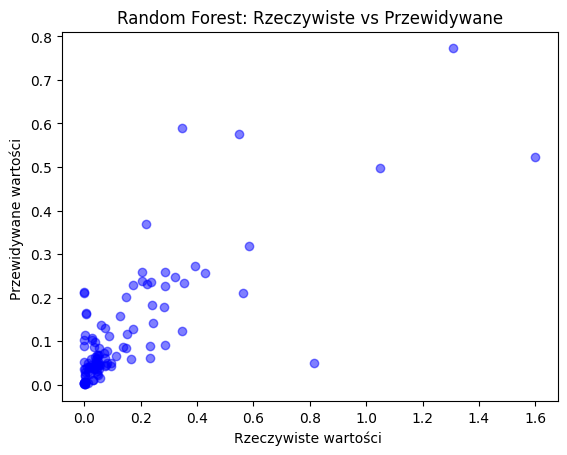

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler #standaryzacja dla np dat
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder #zamiana string na num
import matplotlib.pyplot as plt 
import numpy as np 
# ctrl + / by komentowac

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\youtube_channel_real_performance_analytics.csv'
df = pd.read_csv(csv_path)

df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

df['Year'] = df['Video Publish Time'].dt.year  # Rok publikacji

scaller=StandardScaler()
df['Watch Time scaled']=scaller.fit_transform(df[['Watch Time (hours)']])

X = df[['Year', 'Watch Time scaled', 'Views']]
y=df['Revenue per 1000 Views (USD)']

correlation=df[['Year','Watch Time scaled','Views','Revenue per 1000 Views (USD)']].corr()
print(correlation)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)
rf=RandomForestRegressor(n_estimators=100,max_depth=10,random_state=41)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

r2_test = r2_score(y_test, y_pred)
print(f"R^2 on test set: {r2_test}")

kfold=KFold(n_splits=5,shuffle=True,random_state=41)
walidacja=cross_val_score(rf,X_train,y_train,cv=kfold,scoring='r2')

print('walidacja')
print(f'Cross-Validation R^2 Scores: {walidacja}')

print(f'R^2: {rf.score(X_test, y_test):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Rzeczywiste wartości ')
plt.ylabel('Przewidywane wartości ')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')
plt.show()

Brandscalled           0.003490
Year                   0.663036
Engine_Size            0.357403
Fuel_Typescalled      -0.037178
Transmissionscalled   -0.218992
Mileage               -0.551227
Doors                  0.000511
Owner_Count            0.002656
Price                  1.000000
Name: Price, dtype: float64
R^2 on test set: 0.8554769755060981
Cross-Validation R^2 Scores: [0.87603372 0.86176088 0.86062384 0.85662549 0.86856115]
R^2: 0.86
Mean Absolute Error: 967.36


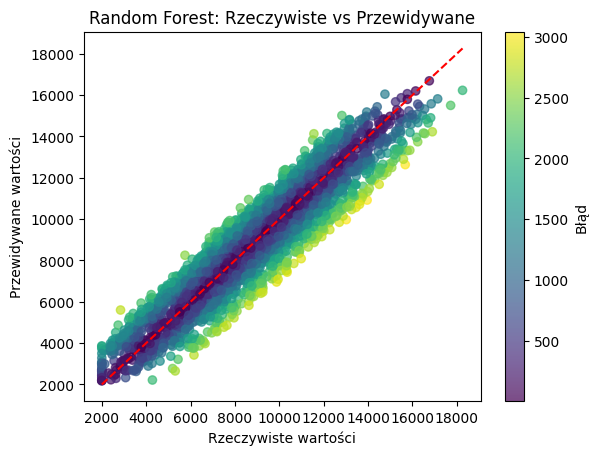

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\carprice.csv'
df = pd.read_csv(csv_path)

label_encoder = LabelEncoder()
df['Brandscalled'] = label_encoder.fit_transform(df['Brand'])
df['Transmissionscalled'] = label_encoder.fit_transform(df['Transmission'])
df['Fuel_Typescalled'] = label_encoder.fit_transform(df['Fuel_Type'])

scaler = StandardScaler()
X.loc[:, ['Year', 'Engine_Size', 'Mileage']] = scaler.fit_transform(X[['Year', 'Engine_Size', 'Mileage']]).astype('float64')


# Wybór cech i zmiennej docelowej
X = df[['Year', 'Engine_Size','Mileage']] 
y = df['Price']

# Korelacja z ceną
corelation = df[['Brandscalled', 'Year', 'Engine_Size', 'Fuel_Typescalled', 'Transmissionscalled', 'Mileage', 'Doors', 'Owner_Count', 'Price']].corr()['Price']
print(corelation)
df.head()

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

# Trening modelu
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=41)
rf.fit(X_train, y_train)

# Przewidywanie
y_pred = rf.predict(X_test)

# Ocena modelu
r2_test = r2_score(y_test, y_pred)
print(f"R^2 on test set: {r2_test}")

# Walidacja krzyżowa
kfold = KFold(n_splits=5, shuffle=True, random_state=41)
walidacja = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='r2')
print(f'Cross-Validation R^2 Scores: {walidacja}')

# Drukowanie wyników
print(f'R^2: {rf.score(X_test, y_test):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

# Obliczanie błędu (różnica między rzeczywistymi a przewidywanymi wartościami)
errors = np.abs(y_test - y_pred)

# Użycie mapy kolorów na podstawie błędu
plt.scatter(y_test, y_pred, c=errors, cmap='viridis', alpha=0.7)

# Dodanie linii tożsamości (gdzie przewidywana wartość = rzeczywista wartość)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Etykiety i tytuł
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')

# Dodanie paska kolorów
plt.colorbar(label='Błąd')

# Wyświetlenie wykresu
plt.show()


# Ada Boost

Brandscalled           0.003490
Year                   0.663036
Engine_Size            0.357403
Fuel_Typescalled      -0.037178
Transmissionscalled   -0.218992
Mileage               -0.551227
Doors                  0.000511
Owner_Count            0.002656
Price                  1.000000
Name: Price, dtype: float64
R^2 on test set: 0.8619547357128137


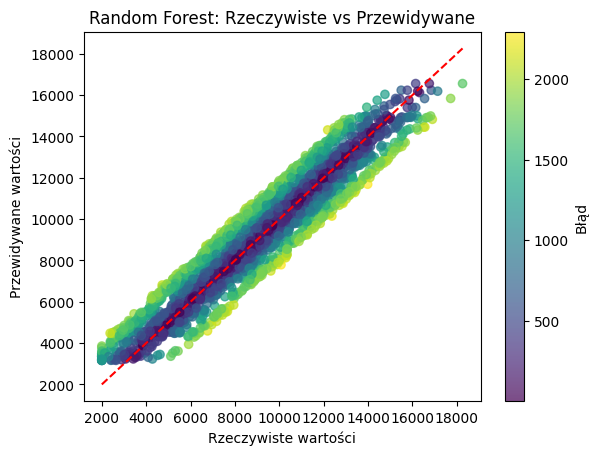

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler #standaryzacja dla np dat
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder #zamiana string na num
import matplotlib.pyplot as plt 
import numpy as np # ctrl + / by komentowac

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\carprice.csv'
df = pd.read_csv(csv_path)

# Kodowanie kategorii na liczby
label_encoder = LabelEncoder()
df['Brandscalled'] = label_encoder.fit_transform(df['Brand'])
df['Transmissionscalled'] = label_encoder.fit_transform(df['Transmission'])
df['Fuel_Typescalled'] = label_encoder.fit_transform(df['Fuel_Type'])

# Standaryzacja wybranych cech numerycznych
scaler = StandardScaler()
X.loc[:, ['Year', 'Engine_Size', 'Mileage']] = scaler.fit_transform(X[['Year', 'Engine_Size', 'Mileage']]).astype('float64')


# Wybór cech i zmiennej docelowej
X = df[['Year', 'Engine_Size','Mileage']] 
y = df['Price']

# Korelacja z ceną
corelation = df[['Brandscalled', 'Year', 'Engine_Size', 'Fuel_Typescalled', 'Transmissionscalled', 'Mileage', 'Doors', 'Owner_Count', 'Price']].corr()['Price']
print(corelation)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

myestimator=DecisionTreeRegressor(max_depth=5)

clf = AdaBoostRegressor(estimator=myestimator, random_state=41)
clf.fit(X,y)

df.head()

# Przewidywanie
y_pred = clf.predict(X_test)

# Ocena modelu
r2_test = r2_score(y_test, y_pred)
print(f"R^2 on test set: {r2_test}")

# Obliczanie błędu (różnica między rzeczywistymi a przewidywanymi wartościami)
errors = np.abs(y_test - y_pred)

# Użycie mapy kolorów na podstawie błędu
plt.scatter(y_test, y_pred, c=errors, cmap='viridis', alpha=0.7)

# Dodanie linii tożsamości (gdzie przewidywana wartość = rzeczywista wartość)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Etykiety i tytuł
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Random Forest: Rzeczywiste vs Przewidywane')

# Dodanie paska kolorów
plt.colorbar(label='Błąd')

# Wyświetlenie wykresu
plt.show()


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler  # Standaryzacja dla np dat
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder  # Zamiana string na num
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Wczytanie danych
csv_path = r'C:\Users\USER098\Documents\GitHub\Python-scikit-learn-alg\llmy\archive\film_imdbrating.csv'
df = pd.read_csv(csv_path)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Kodowanie kategorii na liczby
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])
df['genres'] = label.fit_transform(df['genres'])

# Standaryzacja 'releaseYear'
scaler = StandardScaler()
df['releaseYearscaled'] = scaler.fit_transform(df[['releaseYear']])  # Reshaped for proper scaling

# Korelacja
correlation = df[['type', 'genres', 'releaseYearscaled', 'imdbAverageRating', 'imdbNumVotes']].corr()['imdbAverageRating']
print(correlation)

# Wybór cech i zmiennej docelowej
X = df[['type', 'genres', 'imdbNumVotes']]
y = df['imdbAverageRating']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

# Estymator bazowy (drzewo decyzyjne)
myestimator = DecisionTreeRegressor(max_depth=5)

# Inicjalizacja modelu AdaBoost
clf = AdaBoostRegressor(estimator=myestimator, random_state=41)

# Train the model using the imputed data
clf.fit(X_train_imputed, y_train)

# Przewidywanie
y_pred = clf.predict(X_test)

# Ocena modelu
r2_test = r2_score(y_test, y_pred)
print(f"R^2 on test set: {r2_test}")

# Wizualizacja wyników
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Rzeczywiste wartości (Rating)')
plt.ylabel('Przewidywane wartości (Rating)')
plt.title('AdaBoost Regressor: Rzeczywiste vs Przewidywane')
plt.show()


type                 0.296611
genres               0.011788
releaseYearscaled   -0.128040
imdbAverageRating    1.000000
imdbNumVotes         0.248727
Name: imdbAverageRating, dtype: float64


ValueError: Input y contains NaN.